In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('Dataset/disney_movies.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


In [3]:
df.describe()

,total_gross,inflation_adjusted_gross
count,5.790000e+02,5.790000e+02
mean,6.470179e+07,1.187625e+08
std,9.301301e+07,2.860853e+08
min,0.000000e+00,0.000000e+00
25%,1.278886e+07,2.274123e+07
50%,3.070245e+07,5.515978e+07
75%,7.570903e+07,1.192020e+08
max,9.366622e+08,5.228953e+09


In [4]:
df.sample(10)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
257,Shadow Conspiracy,1997-01-31,Thriller/Suspense,R,2154540,3957025
445,The Prestige,2006-10-20,Thriller/Suspense,PG-13,53089891,68289913
32,Tex,1982-11-19,Drama,NaN,7199408,20643199
116,The Hand That Rocks the Cradle,1992-01-10,Thriller/Suspense,R,88036683,178831137
77,Dead Poets Society,1989-06-02,Drama,PG,95860116,202531517
434,Eight Below,2006-02-17,Adventure,PG,81612565,105037235
313,"Mystery, Alaska",1999-10-01,Comedy,R,8891623,14755189
134,Consenting Adults,1992-10-16,Drama,R,21591728,43859823
112,Ernest Scared Stupid,1991-10-11,Comedy,PG,14143280,28320147
422,Dark Water,2005-07-08,Thriller/Suspense,PG-13,25473093,33500491


In [6]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [7]:
df['release_year'] = df['release_date'].dt.year

In [8]:
df.head(10)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,release_year
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1946
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,1950
5,"20,000 Leagues Under the Sea",1954-12-23,Adventure,NaN,28200000,528279994,1954
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515,1955
7,Sleeping Beauty,1959-01-29,Drama,NaN,9464608,21505832,1959
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985,1961
9,The Absent Minded Professor,1961-03-16,Comedy,NaN,25381407,310094574,1961


In [22]:
df['mpaa_rating'].value_counts()

PG           187
PG-13        145
R            102
G             86
Not Rated      3
Name: mpaa_rating, dtype: int64

[Text(0, 0.5, 'Ingreso bruto ajustado por inflación'),
 Text(0.5, 0, 'Año de lanzamiento'),
 Text(0.5, 1.0, 'Tendencia en el ingreso según el rating de una película desde el 2000')]

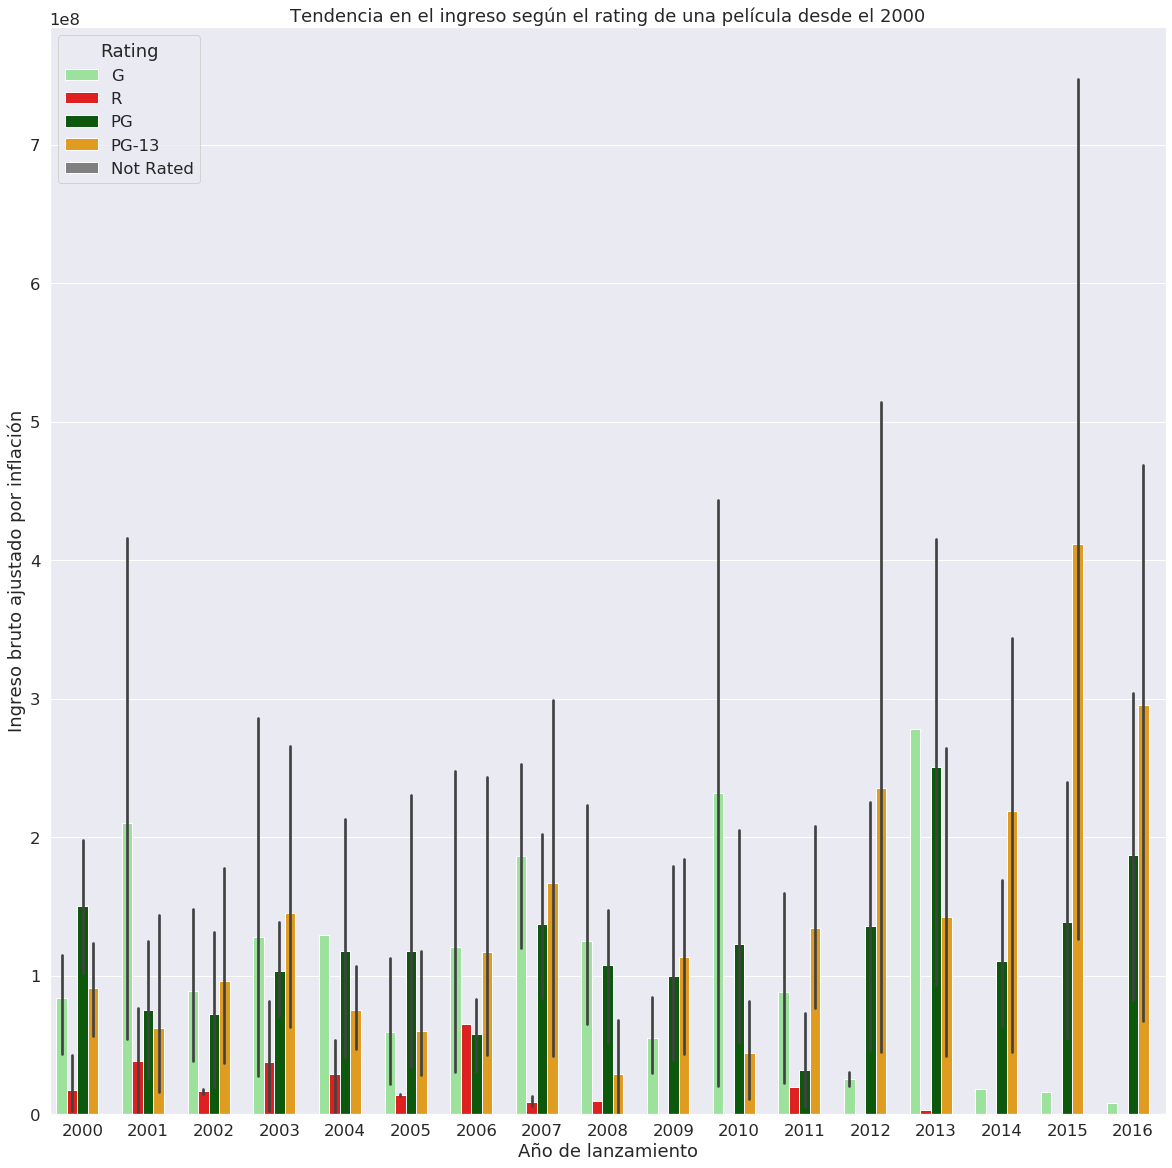

In [37]:
sns.set(rc={'figure.figsize':(20,20)}, font_scale=1.5)

data = df[df['release_year'] >= 2000]

my_palette = {"G": "lightgreen", "PG": "darkgreen", "PG-13":"orange", "R": 'red', "Not Rated": 'gray'}

ax = sns.barplot(x = 'release_year',
            y = 'inflation_adjusted_gross',
            hue = 'mpaa_rating',
            data = data, palette=my_palette)

# title
ax.legend(title='Rating')

ax.set(title='Tendencia en el ingreso según el rating de una película desde el 2000', xlabel='Año de lanzamiento', ylabel='Ingreso bruto ajustado por inflación')

[Text(0, 0.5, 'Género'),
 Text(0.5, 0, 'Ingreso bruto ajustado por inflación '),
 Text(0.5, 1.0, 'Ingreso bruto según género desde el 2000')]

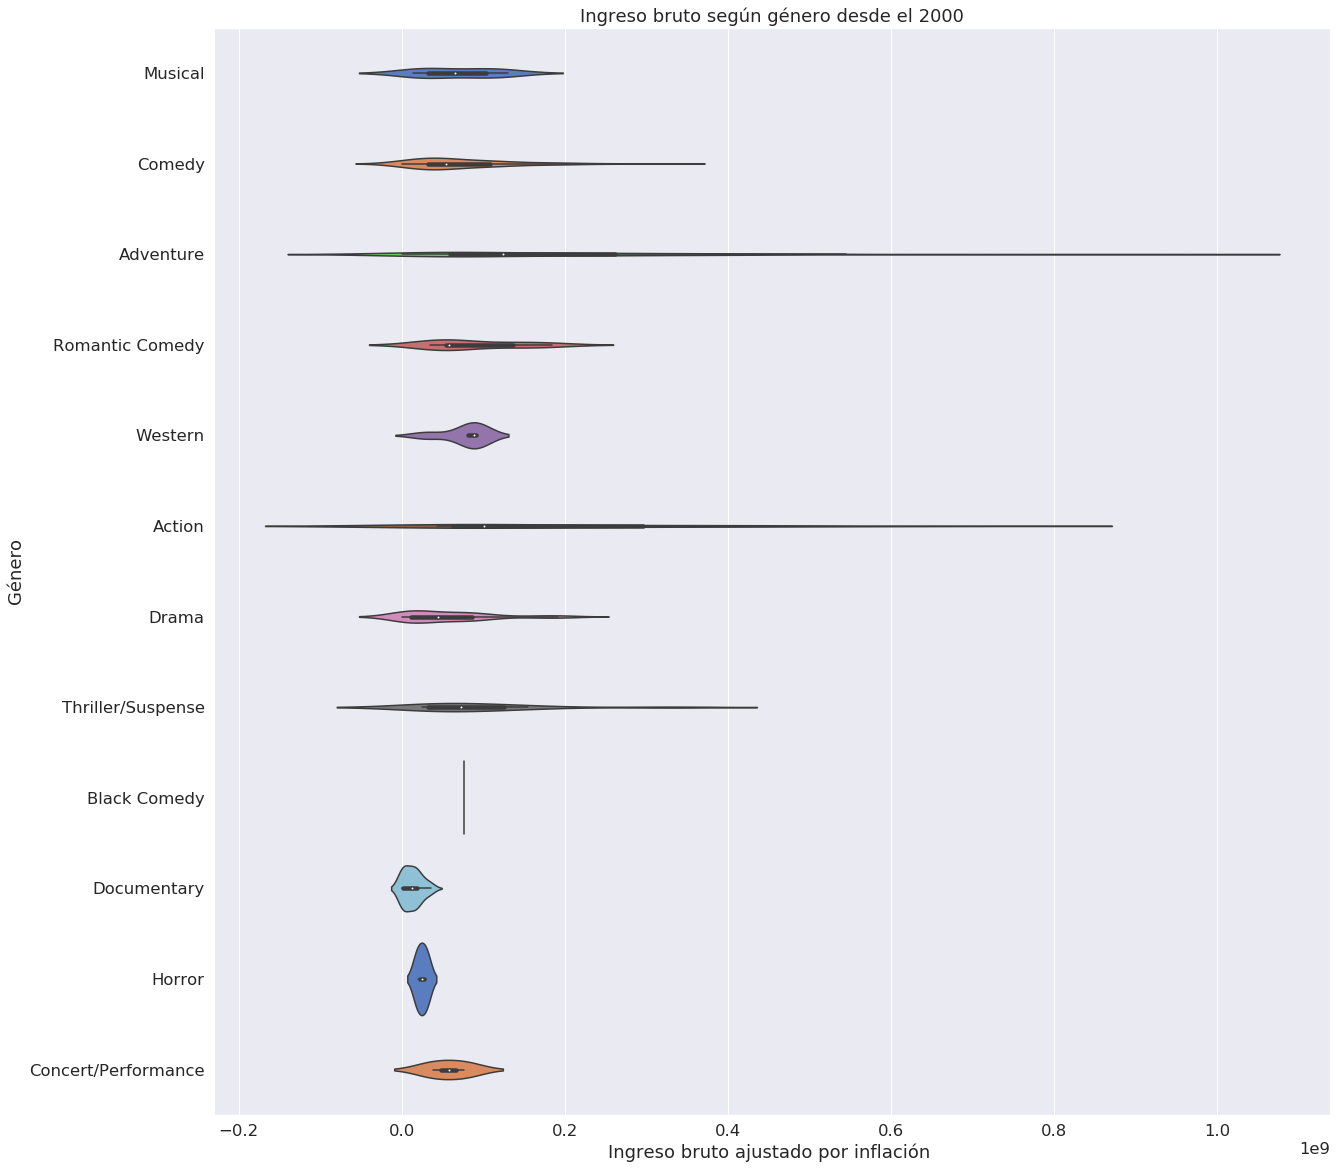

In [44]:
data = df[df['release_year'] >= 2000]


ax = sns.violinplot(x="inflation_adjusted_gross", y="genre",
#                     hue="genre",

                    data=data, palette="muted")

ax.set(title='Ingreso bruto según género desde el 2000', xlabel='Ingreso bruto ajustado por inflación ', ylabel='Género')